### Import packages and data and set up environment

In [1]:
import skfda
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from skfda.exploratory.depth import ModifiedBandDepth, IntegratedDepth
from skfda.exploratory.visualization import Boxplot

from skfda.exploratory.visualization.clustering import (
    ClusterMembershipLinesPlot,
    ClusterMembershipPlot,
    ClusterPlot,
)
from skfda.ml.clustering import FuzzyCMeans, KMeans

from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial


In [2]:
def wf(x):
    return '/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Raw/' + x

In [3]:
V_GRF = pd.read_csv(wf('V_GRF_stance_N.csv'), header = None)
ML_GRF = pd.read_csv(wf('ML_GRF_stance_N.csv'), header = None)
AP_GRF = pd.read_csv(wf('AP_GRF_stance_N.csv'), header = None)

In [4]:
#Defining a list of grid points
grid_points_100 = list(range(1,101))
grid_points_2990 = list(range(1,2991))

### Create the data into an skfda object

In [5]:
#Creating an skfda object ML_GRF
ML_GRF_matrix = ML_GRF.to_numpy()

ML_GRF_fd = skfda.FDataGrid(
    data_matrix=ML_GRF_matrix,
    grid_points=grid_points_100,
)

In [6]:
#Creating an skfda object AP_GRF
AP_GRF_matrix = AP_GRF.to_numpy()

AP_GRF_fd = skfda.FDataGrid(
    data_matrix=AP_GRF_matrix,
    grid_points=grid_points_100,
)

In [7]:
#Creating an skfda object V_GRF
V_GRF_matrix = V_GRF.to_numpy()

V_GRF_fd = skfda.FDataGrid(
    data_matrix=V_GRF_matrix,
    grid_points=grid_points_100,
)

### BSplines representation

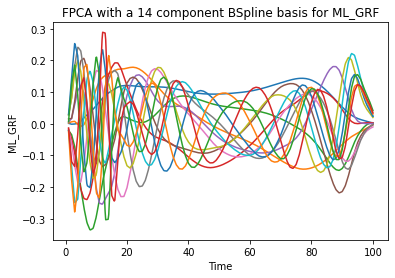

In [70]:
# Medial Lateral

ML_GRF_fpca_bs = FPCA(n_components=14)
ML_GRF_fpca_bs.fit(ML_GRF_fd)
ML_GRF_fpca_bs.components_.plot()
plt.xlabel('Time')
plt.ylabel('ML_GRF')
plt.title('FPCA with a 14 component BSpline basis for ML_GRF')
fig.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/FPCA_ML_GRF_plot.png', dpi=300)


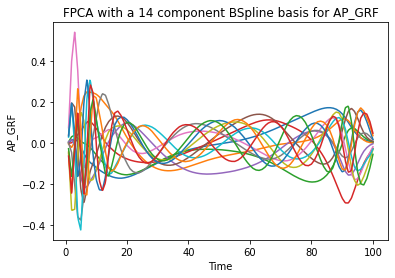

In [71]:
# Anterior Posterior

AP_GRF_fpca_bs = FPCA(n_components=14)
AP_GRF_fpca_bs.fit(AP_GRF_fd)
AP_GRF_fpca_bs.components_.plot()
plt.xlabel('Time')
plt.ylabel('AP_GRF')
plt.title('FPCA with a 14 component BSpline basis for AP_GRF')
fig.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/FPCA_AP_GRF_plot.png', dpi=300)


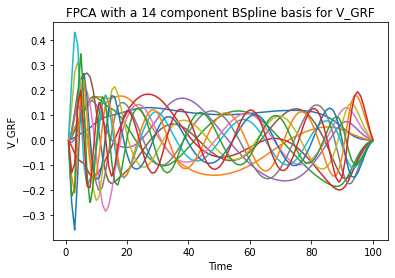

In [72]:
# Vertical

V_GRF_fpca_bs = FPCA(n_components=14)
V_GRF_fpca_bs.fit(V_GRF_fd)
V_GRF_fpca_bs.components_.plot()
plt.xlabel('Time')
plt.ylabel('V_GRF')
plt.title('FPCA with a 14 component BSpline basis for V_GRF')
fig.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/FPCA_V_GRF_plot.png', dpi=300)


AttributeError: 'Line2D' object has no property 'kind'

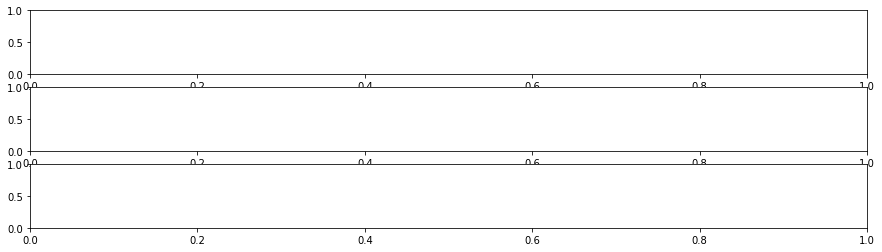

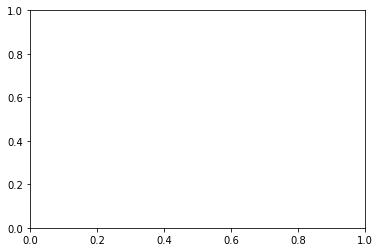

In [88]:
fig, axes = plt.subplots(3, figsize=(8,6)) 
fig.set_size_inches(15, 4)
ML_GRF_fpca_bs.components_.plot(kind='line' , ax=axes[0])
AP_GRF_fpca_bs.components_.plot(kind='line', ax=axes[1])
V_GRF_fpca_bs.components_.plot(kind='line', ax=axes[2])       
axes[0].set_title('MFPCA plot with 8 Principal Components', fontsize=15, pad=15)
plt.tight_layout()

In [81]:
# Explained Variance ratio

ML = pd.DataFrame(ML_GRF_fpca_bs.explained_variance_ratio_)
AP = pd.DataFrame(AP_GRF_fpca_bs.explained_variance_ratio_)
V = pd.DataFrame(V_GRF_fpca_bs.explained_variance_ratio_)

ratio = round(pd.concat([ML, AP, V], axis=1), 2)
ratio.to_csv('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/FPCA_Variance_Ratios.csv')

In [74]:
# Explained Variance ratio, AP_GRF

AP_GRF_fpca_bs.explained_variance_ratio_

array([0.68836721, 0.08655961, 0.05922757, 0.04443929, 0.03772213,
       0.0196296 , 0.01512212, 0.01296072, 0.01033104, 0.00617752,
       0.00424825, 0.00302807, 0.00249251, 0.00171204])

In [75]:
# Explained Variance ratio, V_GRF

V_GRF_fpca_bs.explained_variance_ratio_

array([7.82251757e-01, 1.26199714e-01, 3.41437046e-02, 1.70567240e-02,
       1.32322875e-02, 1.03285577e-02, 6.11495827e-03, 3.43565628e-03,
       2.42233381e-03, 1.41665260e-03, 9.43704129e-04, 6.45586350e-04,
       4.53781449e-04, 3.33458118e-04])

### Fourier basis representation

Text(0.5, 1.0, 'FPCA with a 5 component Fourier basis for VGRF_Stance_N')

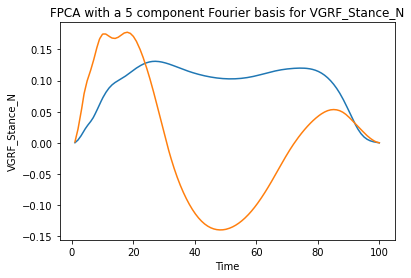

In [10]:
#basis = skfda.representation.basis.BSpline(n_basis=7)
#V_GRF_stance_N_basis_fd = V_GRF_stance_N_fd.to_basis(basis)

V_GRF_fpca_fr = FPCA(n_components=2, components_basis=Fourier)
V_GRF_fpca_fr.fit(V_GRF_fd)
V_GRF_fpca_fr.components_.plot()
plt.xlabel('Time')
plt.ylabel('VGRF_Stance_N')
plt.title('FPCA with a 5 component Fourier basis for VGRF_Stance_N')

In [11]:
# Explained Variance ratio

V_GRF_fpca_fr.explained_variance_ratio_

array([0.78225176, 0.12619971])

### Create scatter matrix

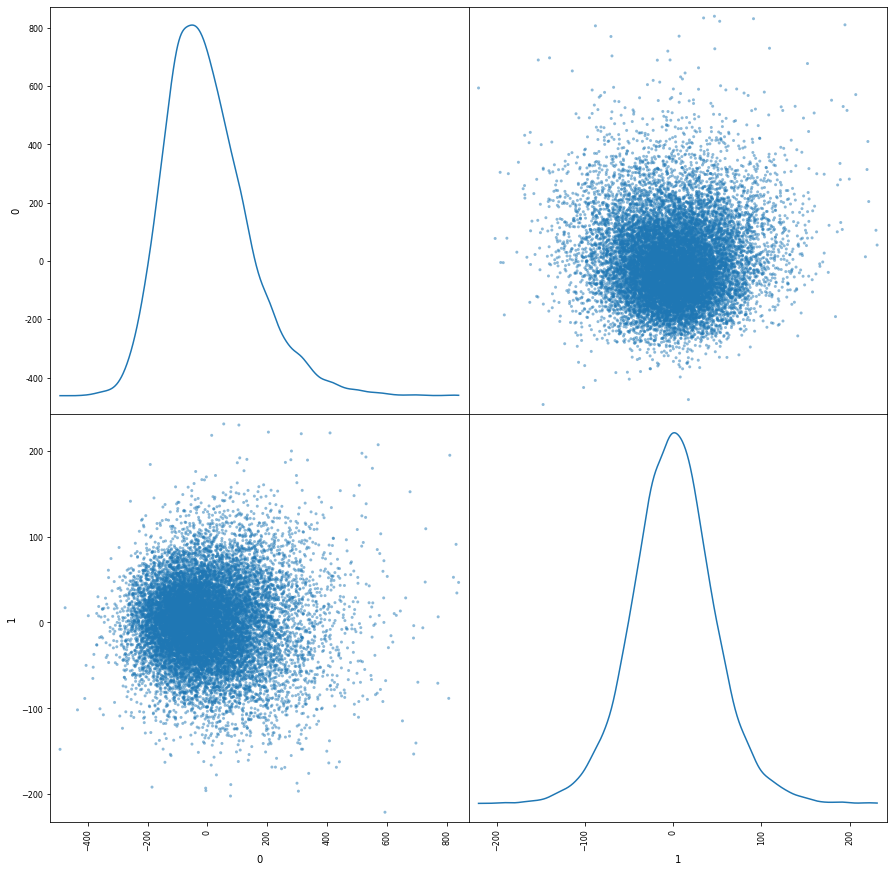

In [13]:
# Medial Lateral

# Compute the scores
ML_GRF_fpca = FPCA(n_components=2)
ML_GRF_fpca.fit(ML_GRF_fd)
ML_GRF_proj = ML_GRF_fpca.transform(ML_GRF_fd)

# Plot the projection of the data onto the eigenfunctions
fig = pd.plotting.scatter_matrix(pd.DataFrame(ML_GRF_proj), diagonal='kde', figsize=(15, 15))
plt.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/FPCA_ML_GRF_scatter_matrix.png', dpi=300)

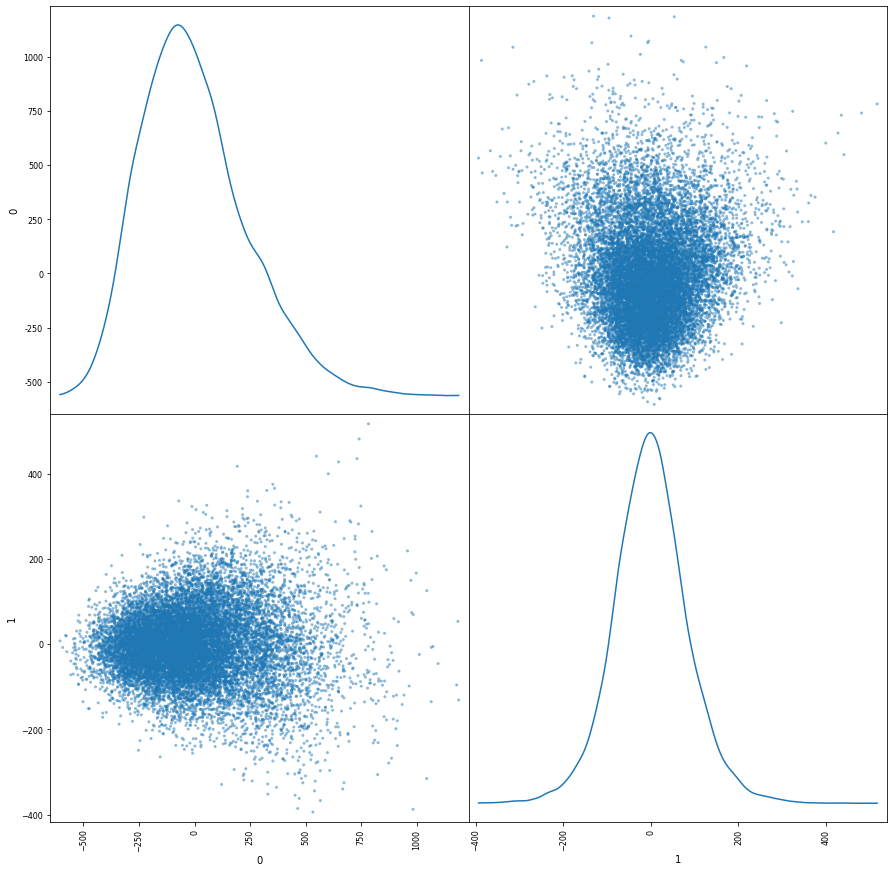

In [14]:
# Anterior Posterior

# Compute the scores
AP_GRF_fpca = FPCA(n_components=2)
AP_GRF_fpca.fit(AP_GRF_fd)
AP_GRF_proj = AP_GRF_fpca.transform(AP_GRF_fd)

# Plot the projection of the data onto the eigenfunctions
fig = pd.plotting.scatter_matrix(pd.DataFrame(AP_GRF_proj), diagonal='kde', figsize=(15, 15))
plt.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/FPCA_AP_GRF_scatter_matrix.png', dpi=300)

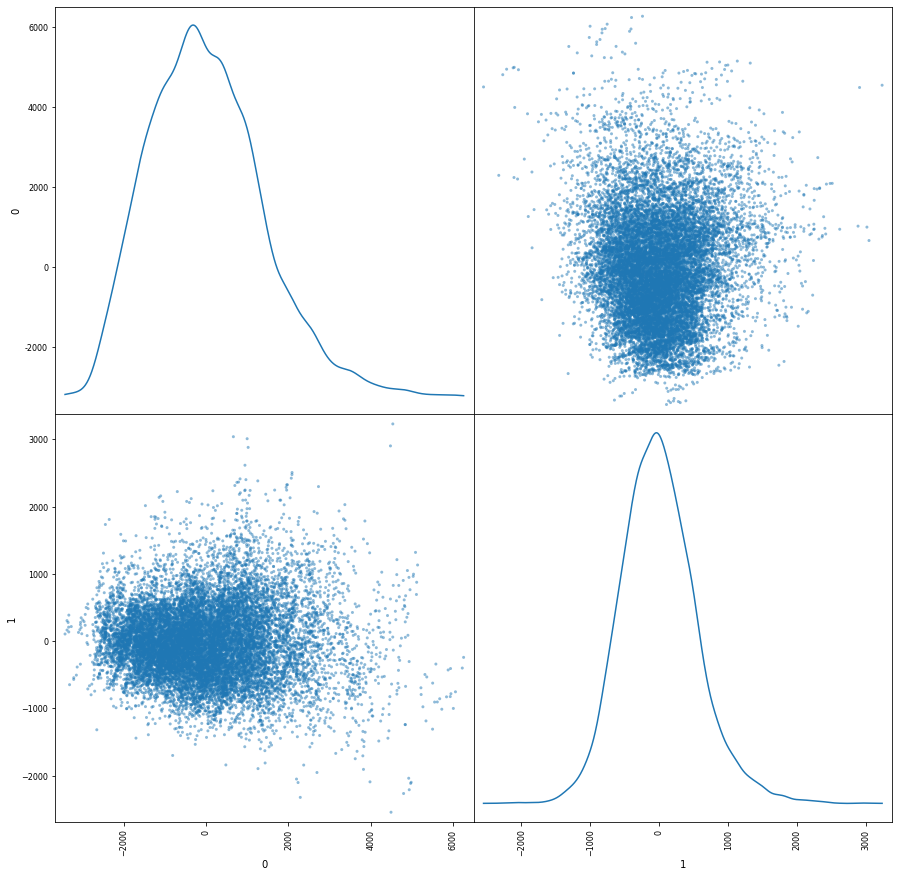

In [15]:
# Vertical

# Compute the scores
V_GRF_fpca = FPCA(n_components=2)
V_GRF_fpca.fit(V_GRF_fd)
V_GRF_proj = V_GRF_fpca.transform(V_GRF_fd)

# Plot the projection of the data onto the eigenfunctions
fig = pd.plotting.scatter_matrix(pd.DataFrame(V_GRF_proj), diagonal='kde', figsize=(15, 15))
plt.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/FPCA_V_GRF_scatter_matrix.png', dpi=300)

### Create plots for reconstructed GRF datasets

 /var/folders/3f/jf0vyw7d5dz_ypqzwp3mnylm0000gn/T/ipykernel_81455/31652310.py:6: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


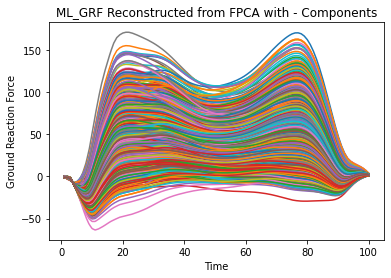

In [16]:
# Medial Lateral

ML_GRF_reconst = ML_GRF_fpca.inverse_transform(ML_GRF_proj)

fig = ML_GRF_reconst.plot()
fig.show()
plt.title("ML_GRF Reconstructed from FPCA with - Components")
plt.xlabel("Time")
plt.ylabel("Ground Reaction Force")
fig.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/FPCA_ML_GRF_reconstructed_plot.png', dpi=300)


 /var/folders/3f/jf0vyw7d5dz_ypqzwp3mnylm0000gn/T/ipykernel_81455/453244306.py:6: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


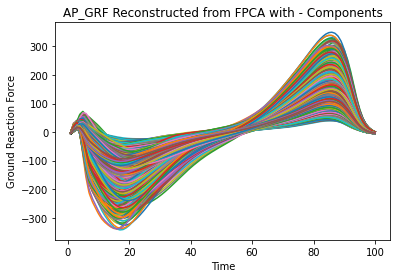

In [17]:
# Anterior Posterior

AP_GRF_reconst = AP_GRF_fpca.inverse_transform(AP_GRF_proj)

fig = AP_GRF_reconst.plot()
fig.show()
plt.title("AP_GRF Reconstructed from FPCA with - Components")
plt.xlabel("Time")
plt.ylabel("Ground Reaction Force")
fig.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/FPCA_AP_GRF_reconstructed_plot.png', dpi=300)


 /var/folders/3f/jf0vyw7d5dz_ypqzwp3mnylm0000gn/T/ipykernel_81455/3258613893.py:6: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


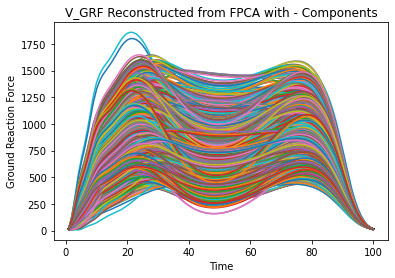

In [18]:
# Vertical

V_GRF_reconst = V_GRF_fpca_bs.inverse_transform(V_GRF_proj)

fig = V_GRF_reconst.plot()
fig.show()
plt.title("V_GRF Reconstructed from FPCA with - Components")
plt.xlabel("Time")
plt.ylabel("Ground Reaction Force")
fig.savefig('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/FPCA_V_GRF_reconstructed_plot.png', dpi=300)


### Calculate MSE

In [35]:
# Define function for MSE

def mse(array1,array2):
    diff = array1 - array2
    sqdiff = diff**2
    n = len(sqdiff)
    sum_sqdiff = sum(sqdiff)
    return sum_sqdiff/n

In [59]:
# define basis

basis = 'Fourier'

In [61]:
# run model

ML_GRF_fpca = FPCA(n_components=2, components_basis=Fourier)
ML_GRF_fpca.fit(ML_GRF_fd)
ML_GRF_reconst = ML_GRF_fpca.inverse_transform(ML_GRF_fpca.transform(ML_GRF_fd))

test = pd.DataFrame()

for i in range(0, 15696):

        row = pd.DataFrame(ML_GRF_reconst.data_matrix[i]).transpose()
        frames = [test, row]
        test = pd.concat(frames) if not test is None else test
                                  
ML_GRF_reconst_array = test.values.flatten()

ML_GRF_df = pd.DataFrame(ML_GRF.values)
ML_GRF_array = ML_GRF_df.values.flatten()

# Anterior Posterior

AP_GRF_fpca = FPCA(n_components=2, components_basis=Fourier)
AP_GRF_fpca.fit(AP_GRF_fd)
AP_GRF_reconst = AP_GRF_fpca.inverse_transform(AP_GRF_fpca.transform(AP_GRF_fd))

test = pd.DataFrame()

for i in range(0, 15696):

        row = pd.DataFrame(AP_GRF_reconst.data_matrix[i]).transpose()
        frames = [test, row]
        test = pd.concat(frames) if not test is None else test
                                  
AP_GRF_reconst_array = test.values.flatten()

AP_GRF_df = pd.DataFrame(AP_GRF.values)
AP_GRF_array = AP_GRF_df.values.flatten()

# Vertical 

V_GRF_fpca = FPCA(n_components=2, components_basis=Fourier)
V_GRF_fpca.fit(V_GRF_fd)
V_GRF_reconst = V_GRF_fpca.inverse_transform(V_GRF_fpca.transform(V_GRF_fd))

test = pd.DataFrame()

for i in range(0, 15696):

        row = pd.DataFrame(V_GRF_reconst.data_matrix[i]).transpose()
        frames = [test, row]
        test = pd.concat(frames) if not test is None else test
                                  
V_GRF_reconst_array = test.values.flatten()

V_GRF_df = pd.DataFrame(V_GRF.values)
V_GRF_array = V_GRF_df.values.flatten()

In [62]:
# calculate mse

mse_AP_GRF = str(round(mse(AP_GRF_array, AP_GRF_reconst_array), 2))
mse_ML_GRF = str(round(mse(ML_GRF_array, ML_GRF_reconst_array), 2))
mse_V_GRF = str(round(mse(V_GRF_array, V_GRF_reconst_array), 2))

In [65]:
# Create dataframe with mse values

new = pd.DataFrame({'Components' : [n], 
                        'MSE_ML': [mse_ML_GRF],
                        'MSE_AP': [mse_AP_GRF],
                        'MSE_V': [mse_AP_GRF],
                        'Basis': [basis]
                       })

#mse_GRF = new
mse_GRF = pd.concat([mse_GRF, new])

In [67]:
# create a loop that runs the above process all over again
# run the model, creates reconstructed datasets, calculates mse and adds it to our dataset

for k in range(4, 22, 2):

    # Medial Lateral
    ML_GRF_fpca = FPCA(n_components=k, components_basis=Fourier)
    ML_GRF_fpca.fit(ML_GRF_fd)
    ML_GRF_reconst = ML_GRF_fpca.inverse_transform(ML_GRF_fpca.transform(ML_GRF_fd))

    test = pd.DataFrame()

    for j in range(0, 15696):

        row = pd.DataFrame(ML_GRF_reconst.data_matrix[j]).transpose()
        frames = [test, row]
        test = pd.concat(frames) if not test is None else test
                                  
    ML_GRF_reconst_array = test.values.flatten()

    ML_GRF_df = pd.DataFrame(ML_GRF.values)
    ML_GRF_array = ML_GRF_df.values.flatten()

    # Anterior Posterior

    AP_GRF_fpca = FPCA(n_components=k, components_basis=Fourier)
    AP_GRF_fpca.fit(AP_GRF_fd)
    AP_GRF_reconst = AP_GRF_fpca.inverse_transform(AP_GRF_fpca.transform(AP_GRF_fd))

    test = pd.DataFrame()

    for j in range(0, 15696):

        row = pd.DataFrame(AP_GRF_reconst.data_matrix[j]).transpose()
        frames = [test, row]
        test = pd.concat(frames) if not test is None else test
                                  
    AP_GRF_reconst_array = test.values.flatten()

    AP_GRF_df = pd.DataFrame(AP_GRF.values)
    AP_GRF_array = AP_GRF_df.values.flatten()

    # Vertical 

    V_GRF_fpca = FPCA(n_components=k, components_basis=Fourier)
    V_GRF_fpca.fit(V_GRF_fd)
    V_GRF_reconst = V_GRF_fpca.inverse_transform(V_GRF_fpca.transform(V_GRF_fd))

    test = pd.DataFrame()

    for j in range(0, 15696):

        row = pd.DataFrame(V_GRF_reconst.data_matrix[j]).transpose()
        frames = [test, row]
        test = pd.concat(frames) if not test is None else test
                                  
    V_GRF_reconst_array = test.values.flatten()

    V_GRF_df = pd.DataFrame(V_GRF.values)
    V_GRF_array = V_GRF_df.values.flatten()

    # Calculate mse
    
    mse_AP_GRF = str(round(mse(AP_GRF_array, AP_GRF_reconst_array), 2))
    mse_ML_GRF = str(round(mse(ML_GRF_array, ML_GRF_reconst_array), 2))
    mse_V_GRF = str(round(mse(V_GRF_array, V_GRF_reconst_array), 2))

    # Store values
    new = pd.DataFrame({'Components' : [k], 
                        'MSE_ML': [mse_ML_GRF],
                        'MSE_AP': [mse_AP_GRF],
                        'MSE_V': [mse_AP_GRF],
                        'Basis': [basis]
                       })

    
    mse_GRF = pd.concat([mse_GRF, new])

In [68]:
mse_GRF.to_csv('/Users/zarawaheed/Documents/BostonUniversity/MA679/Final Project/Data/Processed/FPCA_mse.csv')
mse_GRF

,Components,MSE_ML,MSE_AP,MSE_V,Basis
0,2,67.73,190.17,190.17,BSplines
0,4,35.89,102.5,102.5,BSplines
0,6,18.36,54.03,54.03,BSplines
0,8,11.46,30.41,30.41,BSplines
0,10,7.58,16.53,16.53,BSplines
0,12,5.37,10.4,10.4,BSplines
0,14,3.84,6.85,6.85,BSplines
0,16,2.77,4.76,4.76,BSplines
0,18,2.07,3.47,3.47,BSplines
0,20,1.59,2.61,2.61,BSplines
